# 1. feature-based image alignment using OpenCV  

get query.jpg image as with required information. It is standard format of particular bill. 
I try to crop the original image and match features of query image and original image

In [2]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

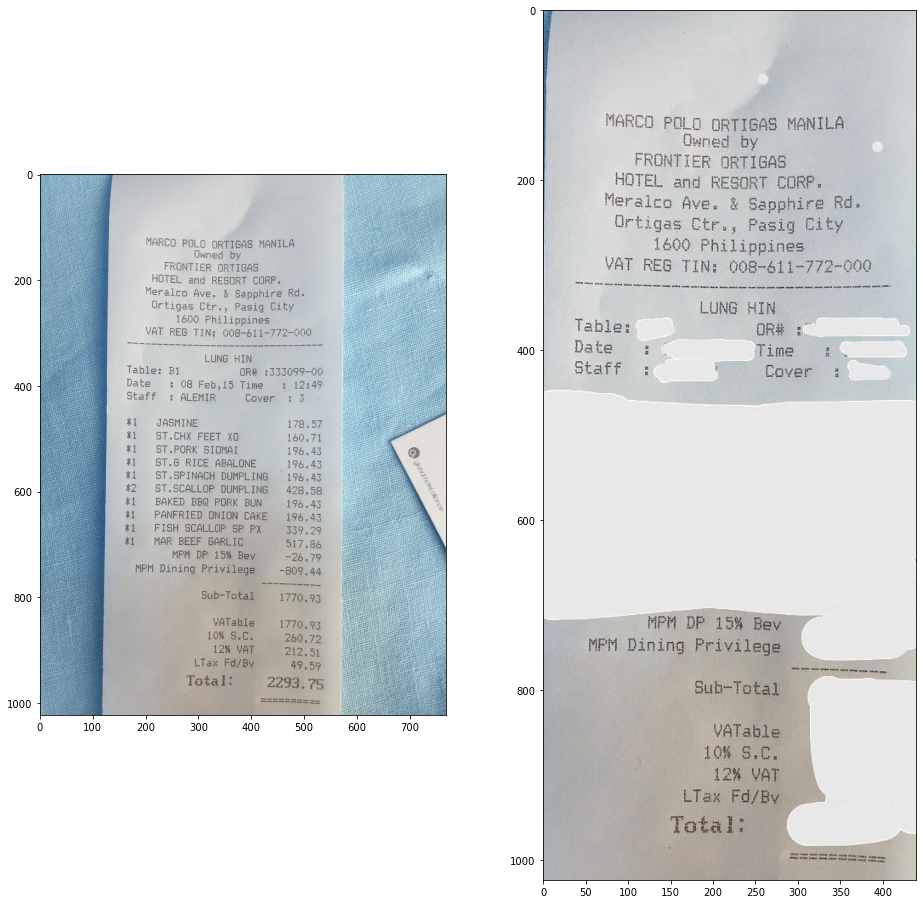

In [3]:
img_original=cv2.imread('images/bill.jpg')
imgQ=cv2.imread('images/query.jpeg')
fig, ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(img_original)
ax[1].imshow(imgQ)

In [4]:
# Detect ORB features and compute descriptors
MAX_FEATURES = 5000
orb = cv2.ORB_create(MAX_FEATURES)
kp1, des1 = orb.detectAndCompute(imgQ, None)

In [5]:
# keypoints1, descriptors1 = orb.detectAndCompute(imgQ, None)

In [6]:

im1=cv2.imread('images/bill.jpg' , cv2.IMREAD_COLOR)
im2=cv2.imread('images/query.jpeg' , cv2.IMREAD_COLOR)

# Convert images to grayscale
im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
 

In [7]:



# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

In [8]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

In [9]:
type(matches)

tuple

In [10]:
GOOD_MATCH_PERCENT = 0.15

# Sort matches by score
matches = list(matches)
matches.sort(key=lambda x: x.distance, reverse=False)
 
  # Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

In [11]:
# Draw top matches
imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
cv2.imwrite("matches.jpg", imMatches)

True

In [12]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

In [13]:
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

In [14]:
# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))

In [15]:
outFilename = "aligned.jpg"
print("Saving aligned image : ", outFilename);
cv2.imwrite(outFilename, im1Reg)

Saving aligned image :  aligned.jpg


True

In [16]:
# Print estimated homography
print("Estimated homography : \n",  h)

Estimated homography : 
 [[ 1.00105815e+00  2.02228892e-04 -1.27202601e+02]
 [ 1.73073255e-04  1.00010926e+00 -4.32559098e-02]
 [ 5.61434850e-07 -6.99529193e-08  1.00000000e+00]]


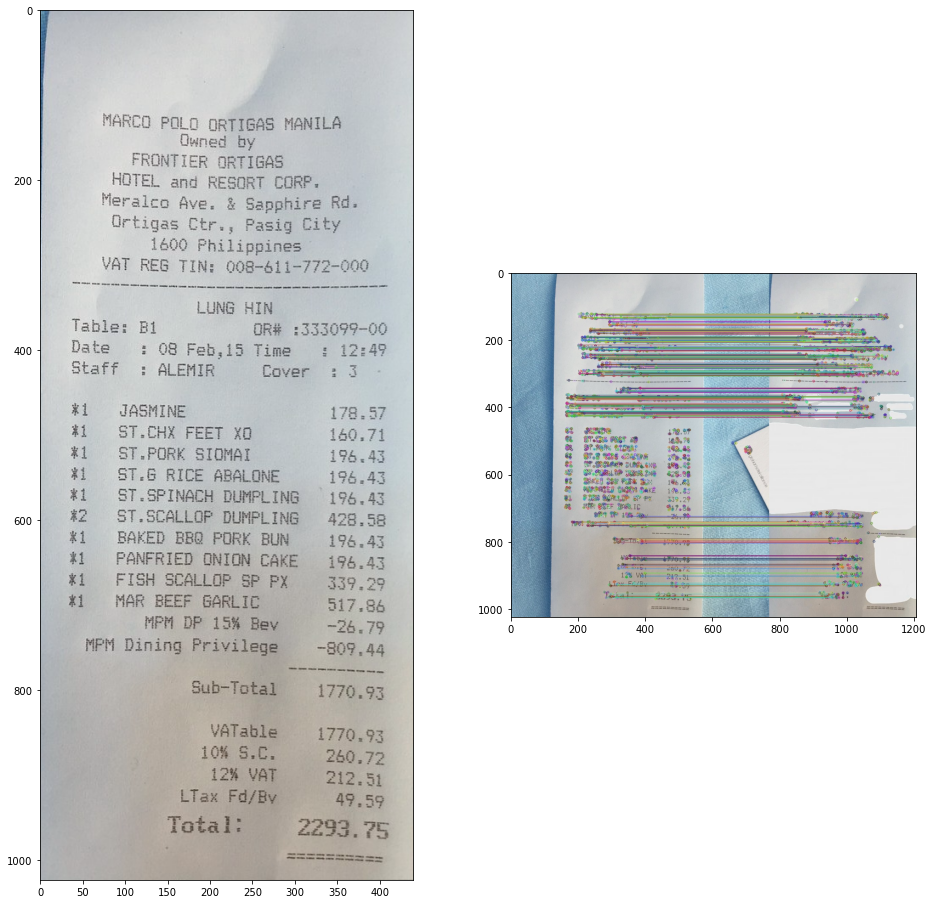

In [17]:
aligned_img=cv2.imread('aligned.jpg')
matches_img=cv2.imread('matches.jpg')
fig, ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(aligned_img)
ax[1].imshow(matches_img)

In [18]:
imgQ = cv2.imread('images/query.jpeg')
h,w,c = imgQ.shape
print(h,w,c)

1024 440 3


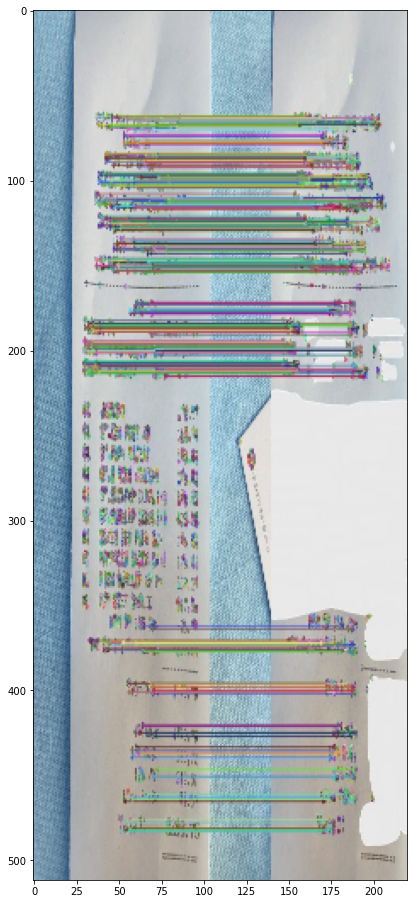

In [19]:
matches_img = cv2.resize(matches_img, (w // 2, h // 2))
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(matches_img)


In [20]:

good = matches[:int(len(matches)*(25/100))]
srcPoints = np.float32([keypoints1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
print(srcPoints)

[[[242.      193.     ]]

 [[400.      256.     ]]

 [[269.      298.     ]]

 [[331.      352.     ]]

 [[183.      394.     ]]

 [[381.      357.     ]]

 [[179.      414.     ]]

 [[437.18405 198.72002]]

 [[338.4116  134.36931]]

 [[345.      131.     ]]

 [[360.      275.     ]]

 [[173.      424.     ]]

 [[351.      271.     ]]

 [[238.      244.     ]]

 [[248.      194.     ]]

 [[392.      746.     ]]

 [[263.52002 259.2    ]]

 [[250.56001 292.32   ]]

 [[176.      375.     ]]

 [[400.      178.     ]]

 [[294.      270.     ]]

 [[392.      369.     ]]

 [[220.      224.     ]]

 [[236.      193.     ]]

 [[304.      245.     ]]

 [[205.      415.     ]]

 [[305.      140.     ]]

 [[354.      306.     ]]

 [[288.      201.     ]]

 [[196.      403.     ]]

 [[202.      403.     ]]

 [[396.      369.     ]]

 [[369.      354.     ]]

 [[315.      249.     ]]

 [[382.      197.     ]]

 [[246.24    302.40002]]

 [[269.      304.     ]]

 [[296.      220.     ]]

 [[388.     

In [21]:
 dstPoints = np.float32([keypoints2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
print(dstPoints)

[[[115.       193.      ]]

 [[273.       256.      ]]

 [[142.       298.      ]]

 [[204.       352.      ]]

 [[ 56.       394.      ]]

 [[254.       357.      ]]

 [[ 52.       414.      ]]

 [[311.04004  198.72002 ]]

 [[211.50725  134.36931 ]]

 [[218.       131.      ]]

 [[233.       275.      ]]

 [[ 46.       424.      ]]

 [[224.       271.      ]]

 [[111.       244.      ]]

 [[121.       194.      ]]

 [[265.       746.      ]]

 [[136.8      259.2     ]]

 [[123.840004 292.32    ]]

 [[ 49.       375.      ]]

 [[273.       178.      ]]

 [[167.       270.      ]]

 [[265.       369.      ]]

 [[ 93.       224.      ]]

 [[109.       193.      ]]

 [[177.       245.      ]]

 [[ 78.       415.      ]]

 [[178.       140.      ]]

 [[227.       306.      ]]

 [[161.       201.      ]]

 [[ 69.       403.      ]]

 [[ 75.       403.      ]]

 [[269.       369.      ]]

 [[242.       354.      ]]

 [[188.       249.      ]]

 [[255.       197.      ]]

 [[119.520004 302.40

In [22]:
M, _ = cv2.findHomography(srcPoints,dstPoints,cv2.RANSAC,5.0)
imgScan = cv2.warpPerspective(im1,M,(w,h))

In [23]:
imgShow = imgScan.copy()
imgMask = np.zeros_like(imgShow)

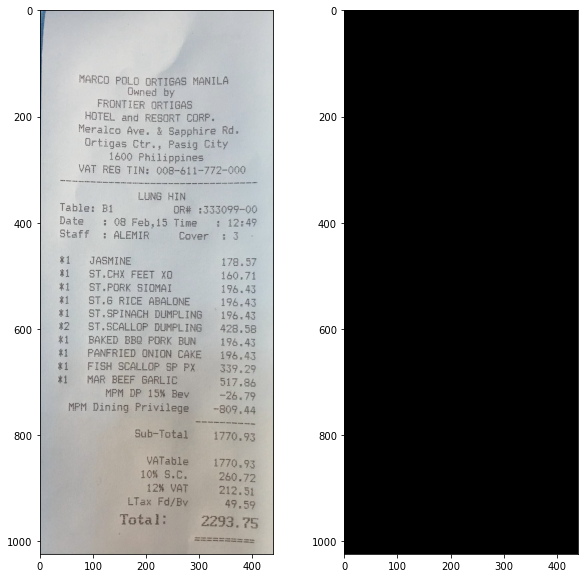

In [24]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(imgShow)
ax[1].imshow(imgMask)

## ----------------------------------------------------------------------------------------------------------

# 2. Extract Image using Python 

In [25]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [27]:
from PIL import Image
from pytesseract import pytesseract
import re

#Define path to tessaract.exe
path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Define path to image
path_to_image = 'images/bill.jpg'

#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

#Open image with PIL
img = Image.open(path_to_image)

#Extract text from image
text = pytesseract.image_to_string(img)

print(text)

MARCO POLO ORTIGAS MANILA

Quned by
FRONTIER ORTIGAS

HOTEL and RESORT CORP.

Meralco Ave. & Sapphire Rd.

Ortigas Ctr., Pasig City

1600 Philippines:

VAT REG TIN: 008-611-772-000
LUNG HIN

Table: Bi OR# :333099-00

Date +: 08 Feb,15 Time + 12:49

Staff : ALEMIR Cover : 3

X10 JASMINE 178.57
41 ST.CHX FEET x0 160,71
x1 ST.PORK SIOMAT 196.43

#1 87.6 RICE ABALONE 196.43
*1 0 ST.SPINACH DUMPLING 196.43
#20 ST.SCALLOP DUMPLING 428.58
Xi BAKED BBQ PORK BUN 196.43
41 PANFRIED ONION CAKE 194.43
¥1 FISH SCALLOP SP PX = 339,29




### From using pytesseract I could extract
- table
- date
- time
- cover
- OR#
- consumed items

In [28]:
LinesFromImage = re.split("\n",text)
# remove empty lines
LinesFromImage = [str for str in LinesFromImage if str] 
LinesFromImage

['MARCO POLO ORTIGAS MANILA',
 'Quned by',
 'FRONTIER ORTIGAS',
 'HOTEL and RESORT CORP.',
 'Meralco Ave. & Sapphire Rd.',
 'Ortigas Ctr., Pasig City',
 '1600 Philippines:',
 'VAT REG TIN: 008-611-772-000',
 'LUNG HIN',
 'Table: Bi OR# :333099-00',
 'Date +: 08 Feb,15 Time + 12:49',
 'Staff : ALEMIR Cover : 3',
 'X10 JASMINE 178.57',
 '41 ST.CHX FEET x0 160,71',
 'x1 ST.PORK SIOMAT 196.43',
 '#1 87.6 RICE ABALONE 196.43',
 '*1 0 ST.SPINACH DUMPLING 196.43',
 '#20 ST.SCALLOP DUMPLING 428.58',
 'Xi BAKED BBQ PORK BUN 196.43',
 '41 PANFRIED ONION CAKE 194.43',
 '¥1 FISH SCALLOP SP PX = 339,29']

In [29]:
Items =     LinesFromImage[12:]
dictItem={}
for i in Items:
    k = i.split()
    ItemName = ' '.join(k[:-1]) 
    price  = k[-1]
    print('ItemName ->' , ItemName)    
    print('price ->' , price)
    dictItem[ItemName] = price

ItemName -> X10 JASMINE
price -> 178.57
ItemName -> 41 ST.CHX FEET x0
price -> 160,71
ItemName -> x1 ST.PORK SIOMAT
price -> 196.43
ItemName -> #1 87.6 RICE ABALONE
price -> 196.43
ItemName -> *1 0 ST.SPINACH DUMPLING
price -> 196.43
ItemName -> #20 ST.SCALLOP DUMPLING
price -> 428.58
ItemName -> Xi BAKED BBQ PORK BUN
price -> 196.43
ItemName -> 41 PANFRIED ONION CAKE
price -> 194.43
ItemName -> ¥1 FISH SCALLOP SP PX =
price -> 339,29


In [30]:
dictItem

{'X10 JASMINE': '178.57',
 '41 ST.CHX FEET x0': '160,71',
 'x1 ST.PORK SIOMAT': '196.43',
 '#1 87.6 RICE ABALONE': '196.43',
 '*1 0 ST.SPINACH DUMPLING': '196.43',
 '#20 ST.SCALLOP DUMPLING': '428.58',
 'Xi BAKED BBQ PORK BUN': '196.43',
 '41 PANFRIED ONION CAKE': '194.43',
 '¥1 FISH SCALLOP SP PX =': '339,29'}

In [31]:
import json
dict1 = {}
list_of_words = text.split()

my_search_words_1 = ['Table:' , 'OR#' ]
my_search_words_2 = ['Staff' , 'Time' , 'Cover' ]
for w1 in my_search_words_1:
    dict1[w1] = list_of_words[list_of_words.index(w1) + 1]
for w2 in my_search_words_2:
    dict1[w2] = list_of_words[list_of_words.index(w2) + 2]

w3 = 'Date'
dict1['date'] = (list_of_words[list_of_words.index(w3) + 2]) +","+ (list_of_words[list_of_words.index(w3) + 3])
dict1['Consumed Items'] = dictItem

Bill_Json = json.dumps(dict1)
print(Bill_Json)


{"Table:": "Bi", "OR#": ":333099-00", "Staff": "ALEMIR", "Time": "12:49", "Cover": "3", "date": "08,Feb,15", "Consumed Items": {"X10 JASMINE": "178.57", "41 ST.CHX FEET x0": "160,71", "x1 ST.PORK SIOMAT": "196.43", "#1 87.6 RICE ABALONE": "196.43", "*1 0 ST.SPINACH DUMPLING": "196.43", "#20 ST.SCALLOP DUMPLING": "428.58", "Xi BAKED BBQ PORK BUN": "196.43", "41 PANFRIED ONION CAKE": "194.43", "\u00a51 FISH SCALLOP SP PX =": "339,29"}}


# 3 . Extract text using Open CV

In [32]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [33]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



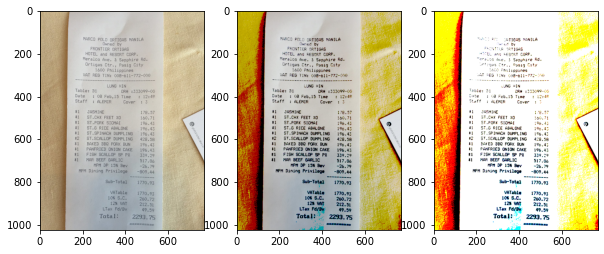

In [34]:

bill_original = cv.imread(r"images/bill.jpg").astype(np.uint8)
bill_blur= cv.GaussianBlur(bill_original, (3,3), cv.BORDER_DEFAULT)

threshold ,thresh_1 = cv.threshold(bill_blur,149,255,cv.THRESH_TOZERO)
threshold ,thresh_2 = cv.threshold(bill_blur,149,255,cv.THRESH_BINARY)
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(bill_original, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(thresh_1, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(thresh_2, cv.COLOR_BGR2RGB))


- I choose  THRESH_TOZERO thresh_1 image

In [35]:
from pytesseract import pytesseract
from pytesseract import Output

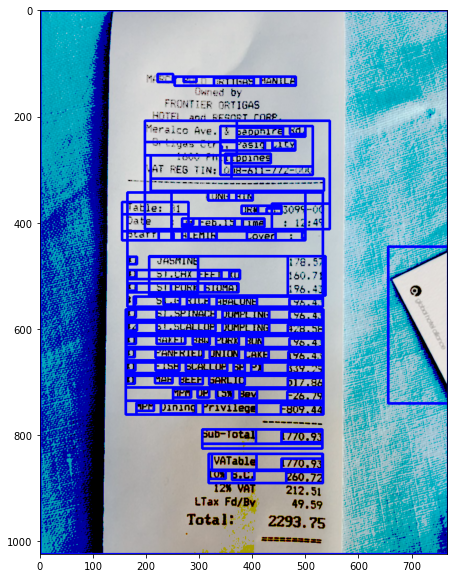

In [36]:
pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
d = pytesseract.image_to_data(thresh_1, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    thresh = cv.rectangle(thresh_1, (x, y), (x + w, y + h), (0, 0, 255), 3)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(thresh)


In [37]:
ImageToString = pytesseract.image_to_string(thresh_1).splitlines()
print(ImageToString)

['eam acrsy Mite H-', '', 'roe', 'beppnire Gd', '', 'ity', '', 'FPP EG o', 'PUPA BIOMaS', 'Sha RICA Beat One', 'BT OP THOCH DUNPL ING SO 4', 'EB ALLUES DURPLING ica on', 'PALE BE) PORK BUN Yo)', 'PONCRIEU UNION LAKE fv ay', 'POM BUALLOM bh Pi int', 'CS BEER BARLIO DI 3g', 'Pa OF os Bev P26 Ty', '', 'BED Vining Privilege ryoy, 44', '', 'Bub-Total 1770.93', '\\VATablel 1770.93', '', '10m B.C. 260,72', 'TR VAT 212.51', 'LTax Fd/By 49,59', 'Total: ~ 2293.75', '']


In [38]:
for line in ImageToString:
  if re.search(r'Total:',line):
    dict1['total'] = line.split()[2]

In [39]:
Bill_Json = json.dumps(dict1)
print(Bill_Json)

{"Table:": "Bi", "OR#": ":333099-00", "Staff": "ALEMIR", "Time": "12:49", "Cover": "3", "date": "08,Feb,15", "Consumed Items": {"X10 JASMINE": "178.57", "41 ST.CHX FEET x0": "160,71", "x1 ST.PORK SIOMAT": "196.43", "#1 87.6 RICE ABALONE": "196.43", "*1 0 ST.SPINACH DUMPLING": "196.43", "#20 ST.SCALLOP DUMPLING": "428.58", "Xi BAKED BBQ PORK BUN": "196.43", "41 PANFRIED ONION CAKE": "194.43", "\u00a51 FISH SCALLOP SP PX =": "339,29"}, "total": "2293.75"}


In [40]:
# Create Python object from JSON string data
obj = json.loads(Bill_Json)
 
# Pretty Print JSON
json_formatted_str = json.dumps(obj, indent=4)
print(json_formatted_str)

{
    "Table:": "Bi",
    "OR#": ":333099-00",
    "Staff": "ALEMIR",
    "Time": "12:49",
    "Cover": "3",
    "date": "08,Feb,15",
    "Consumed Items": {
        "X10 JASMINE": "178.57",
        "41 ST.CHX FEET x0": "160,71",
        "x1 ST.PORK SIOMAT": "196.43",
        "#1 87.6 RICE ABALONE": "196.43",
        "*1 0 ST.SPINACH DUMPLING": "196.43",
        "#20 ST.SCALLOP DUMPLING": "428.58",
        "Xi BAKED BBQ PORK BUN": "196.43",
        "41 PANFRIED ONION CAKE": "194.43",
        "\u00a51 FISH SCALLOP SP PX =": "339,29"
    },
    "total": "2293.75"
}
